### Stats on votable (Julia)

Warning: Maximum of 3M stars allowed per votable by GAIA archive. To be checked.

In [1]:
using  PyCall
using  Statistics , StatsBase
using  DataFrames, Printf , CSV , Query
using  Glob

import PyPlot

## directory
rootdir = ENV["GAIA_ROOT"]
wdir    = "$rootdir/products"
votdir  = "$rootdir/e2e_products/votable.2020"
plotdir = "$wdir/test"
ocdir   = "$wdir/octest"
sclist  = "$rootdir/e2e_products/sc-list-2020.csv"

push!(LOAD_PATH,"$rootdir/master/src")
using GaiaClustering

cd(wdir)

In [2]:
function _getdata(filevot)
    voname = filevot
 
    data       = read_votable(voname)
    df         = filter_data(data,[0., 2000])
    dfcart     = add_cartesian(df)

    return(df)
end

_getdata (generic function with 1 method)

In [3]:
function _plot_nstars(nstarh,plotfile="test-stats-votable.png")
    println("## plotting distribution...")
    PyPlot.plt.figure(figsize=(9.0,8.0))
    PyPlot.plt.subplot(1, 1, 1 )
    nbins = 50
    PyPlot.plt.hist(nstarh,nbins, range = [0,3e5],  color = "g", alpha=0.8 , label = "Votable stars",density=false)
    PyPlot.plt.xlabel("Stars")
    PyPlot.plt.ylabel("N")
    PyPlot.plt.grid(true)
    PyPlot.plt.savefig(plotdir*"/"*plotfile)
    PyPlot.plt.show()
end

_plot_nstars (generic function with 2 methods)

In [4]:
## to check is done and record
## check and updt if votname analyzed. If not done return false
function _updt!(fileres, votname , nstar, onlycheck=true)
    if  onlycheck
        if !isfile(fileres)
            return(0, false)
        else
            res = DataFrames.copy(CSV.read(fileres, delim=";"))
            if votname in res.votname
                x = @from i in res begin
                    @where i.votname == votname
                    @select i
                    @collect DataFrame
                end
                return(x, true)
            else
                return(0, false)
            end 
        end
    ## UPDTE
    else
        if !isfile(fileres)
            res = DataFrame(votname=votname, nstar=nstar)
            CSV.write(fileres,res,delim=';')
            println("## $fileres created...")
            return(res,true)
        else
            res = DataFrames.copy(CSV.read(fileres, delim=";"))
            newrow = DataFrame(votname=votname,nstar=nstar)
            append!(res,newrow)
            CSV.write(fileres,res,delim=';')
            return(res,true)
        end
    end
end

_updt! (generic function with 2 methods)

In [5]:
function main(votlist, fileres, blacklist="blacklist-test.csv")
    nfile= length(votlist)
    println("## Stats on votable...")
    println("## $nfile votables to analyze")
    println("## NO Data filtered in distance ..")

    nstarh= []
    if isfile(blacklist)
        blck= DataFrames.copy(CSV.read(blacklist, delim=";"))
        blcklist= blck.votname
        println("## blacklist $blacklist read")
    else
        blcklist= []
    end
        
        
    for votname in votlist
        if votname in blcklist
            println("## $votname in blacklist...")
        else
            println("## $votname")
            res , check = _updt!(fileres, votname, -1, true)
            if check
                println(res.nstar[1])
                push!(nstarh, res.nstar[1])
            else
                data = _getdata(votdir*"/"*votname)
                #nstars= size(data)[1]
                nstars= size(data.raw)[2]
                
                println(nstars)
                push!(nstarh,nstars)
                res , check = _updt!(fileres, votname, nstars, false)
            end
        end
    end
    _plot_nstars(nstarh, "test-votable.2000pc.png")
end

main (generic function with 2 methods)

## Stats on votable...
## 277 votables to analyze
## NO Data filtered in distance ..
## blacklist blacklist-test.csv read
## NGC 1027-2.3deg.vot
60385
## NGC 110-2.0deg.vot
39508
## NGC 1252-2.5deg.vot
20040
## NGC 129-2.0deg.vot
59441
## NGC 133-2.0deg.vot
53062
## NGC 1333-5.7deg.vot
123210
## NGC 1342-2.8deg.vot
41050
## NGC 1348-2.0deg.vot
31464
## NGC 1444-2.0deg.vot
31309
## NGC 1496-2.0deg.vot
36884
## NGC 1502-3.0deg.vot
71145
## NGC 1513-2.0deg.vot
34794
## NGC 1520-2.0deg.vot
20590
## NGC 1528-4.5deg.vot
163562
## NGC 1545-2.0deg.vot
34007
## NGC 1557-2.2deg.vot
22421
## NGC 1579-4.2deg.vot
98444
## NGC 1582-4.1deg.vot
137619
## NGC 1641-2.6deg.vot
30767
## NGC 1662-4.8deg.vot
101630
## NGC 1663-2.8deg.vot
33795
## NGC 1664-3.1deg.vot
84962
## NGC 1708-2.4deg.vot
40239
## NGC 1746-6.0deg.vot
198532
## NGC 1778-2.0deg.vot
33583
## NGC 1817-2.6deg.vot
38821
## NGC 189-2.0deg.vot
56544
## NGC 1901-3.4deg.vot
59870
## NGC 1907-2.1deg.vot
39633
## NGC 1912-3.9deg.vot
131963
## NGC

## Filtering done ...
## Stars selected: 90430
## Cartesian transformation done ...
90430
## NGC 6400-2.0deg.vot
## Votable /home/stephane/Science/cluster/GAIA/e2e_products/votable.2020/NGC 6400-2.0deg.vot read
## Filtering done ...
## Stars selected: 96490
## Cartesian transformation done ...
96490
## NGC 6416-2.4deg.vot
## Votable /home/stephane/Science/cluster/GAIA/e2e_products/votable.2020/NGC 6416-2.4deg.vot read
## Filtering done ...
## Stars selected: 129585
## Cartesian transformation done ...
129585
## NGC 6425-2.0deg.vot
## Votable /home/stephane/Science/cluster/GAIA/e2e_products/votable.2020/NGC 6425-2.0deg.vot read
## Filtering done ...
## Stars selected: 87071
## Cartesian transformation done ...
87071
## NGC 6444-2.0deg.vot
## Votable /home/stephane/Science/cluster/GAIA/e2e_products/votable.2020/NGC 6444-2.0deg.vot read
## Filtering done ...
## Stars selected: 128403
## Cartesian transformation done ...
128403
## NGC 6469-2.3deg.vot
## Votable /home/stephane/Science/clust

## Filtering done ...
## Stars selected: 59081
## Cartesian transformation done ...
59081
## NGC 6793-2.2deg.vot
## Votable /home/stephane/Science/cluster/GAIA/e2e_products/votable.2020/NGC 6793-2.2deg.vot read
## Filtering done ...
## Stars selected: 85361
## Cartesian transformation done ...
85361
## NGC 6800-2.0deg.vot
## Votable /home/stephane/Science/cluster/GAIA/e2e_products/votable.2020/NGC 6800-2.0deg.vot read
## Filtering done ...
## Stars selected: 94901
## Cartesian transformation done ...
94901
## NGC 6802-2.0deg.vot
## Votable /home/stephane/Science/cluster/GAIA/e2e_products/votable.2020/NGC 6802-2.0deg.vot read
## Filtering done ...
## Stars selected: 72860
## Cartesian transformation done ...
72860
## NGC 6811-2.0deg.vot
## Votable /home/stephane/Science/cluster/GAIA/e2e_products/votable.2020/NGC 6811-2.0deg.vot read
## Filtering done ...
## Stars selected: 58821
## Cartesian transformation done ...
58821
## NGC 6823-2.0deg.vot
## Votable /home/stephane/Science/cluster/G

## Filtering done ...
## Stars selected: 59143
## Cartesian transformation done ...
59143
## NGC 743-2.0deg.vot
## Votable /home/stephane/Science/cluster/GAIA/e2e_products/votable.2020/NGC 743-2.0deg.vot read
## Filtering done ...
## Stars selected: 48117
## Cartesian transformation done ...
48117
## NGC 7438-2.5deg.vot
## Votable /home/stephane/Science/cluster/GAIA/e2e_products/votable.2020/NGC 7438-2.5deg.vot read
## Filtering done ...
## Stars selected: 109119
## Cartesian transformation done ...
109119
## NGC 744-3.4deg.vot
## Votable /home/stephane/Science/cluster/GAIA/e2e_products/votable.2020/NGC 744-3.4deg.vot read
## Filtering done ...
## Stars selected: 128109
## Cartesian transformation done ...
128109
## NGC 7654-3.2deg.vot
## Votable /home/stephane/Science/cluster/GAIA/e2e_products/votable.2020/NGC 7654-3.2deg.vot read
## Filtering done ...
## Stars selected: 143629
## Cartesian transformation done ...
143629
## NGC 7708-2.0deg.vot
## Votable /home/stephane/Science/cluster

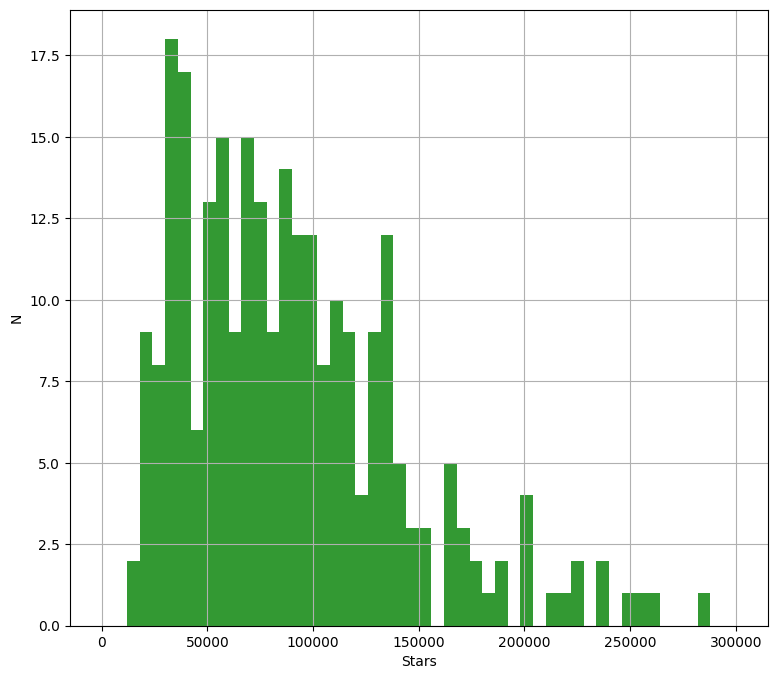

## Filtering done ...
## Stars selected: 82905
## Cartesian transformation done ...
82905
## plotting distribution...


In [6]:
cd(votdir)
votlist= glob("NGC*.vot")

cd(wdir)
main(votlist, "nstars_votable.2000pc.csv")